In [1]:
# !pip install plotly

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys

from os.path import basename
from typing import Dict, Callable

from pathlib import Path
import pickle

import pandas as pd

from collections import namedtuple

from operator import itemgetter

%matplotlib inline

/home/laugustyniak/anaconda3/envs/python36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/laugustyniak/anaconda3/envs/python36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
sys.path.append('/home/laugustyniak/github/phd/sentiment-backend/')
from aspects.analysis.nlp_architect import get_metrics

In [33]:
with open('../models/sentic2vec/model-info-char-bilstm-10epochs-laptops-train.conll.info', 'rb') as f:
    m_info = pickle.load(f)

In [34]:
m_info.keys()

dict_keys(['word_lstm_dims', 'word_vocab', 'labels_id_to_word', 'dropout', 'eval', 'crf_layer', 'char_vocab', 'test_file', 'word_embedding_layer', 'similarity_threshold', 'predictions', 'train_file', 'tagger_lstm_dims', 'y_labels', 'vocab_size', 'word_embedding_dims', 'external_embedding_model', 'augment_data', 'num_of_labels', 'sentence_len', 'word_len', 'char_embedding_dims', 'char_vocab_size', 'epoch', 'bilstm_layer', 'y_test', 'char_embedding_layer'])

In [36]:
m_info['y_test']

array([[[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       ...,

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1.

In [4]:
sys.path.append('/home/laugustyniak/github/phd/nlp-architect/')

In [17]:
model_f1_by_word_embedding = {}
for word_embedding_models_path in list(Path('../models').glob('*')):
    print(word_embedding_models_path)
    models_f1 = []
    
    models_paths = word_embedding_models_path.glob('*10epoch*')
    models_metrics = get_metrics(models_paths)
    for model_name, model_metrics in models_metrics.items():
        print(model_name)
        models_f1.append((model_name, model_metrics.f1))
    models_f1.sort(key=itemgetter(1), reverse=True)
    model_f1_by_word_embedding[word_embedding_models_path.stem] = models_f1
#     print(word_embedding_models_path.stem)
#     print(models_f1)
#     print()

../models/sota-google
model-info-word-bilstm-10epochs-laptops-train.conll
model-info-char-word-lstm-crf-10epochs-laptops-train.conll
model-info-char-word-lstm-10epochs-laptops-train.conll
model-info-char-bilstm-10epochs-laptops-train.conll
model-info-word-lstm-10epochs-laptops-train.conll
model-info-char-lstm-10epochs-laptops-train.conll
model-info-word-bilstm-crf-10epochs-laptops-train.conll
model-info-char-lstm-crf-10epochs-laptops-train.conll
model-info-word-lstm-crf-10epochs-laptops-train.conll
model-info-char-word-bilstm-10epochs-laptops-train.conll
model-info-char-word-bilstm-crf-10epochs-laptops-train.conll
model-info-char-bilstm-crf-10epochs-laptops-train.conll
../models/crawl-300d-2M
model-info-word-bilstm-10epochs-laptops-train.conll
model-info-char-word-lstm-crf-10epochs-laptops-train.conll
model-info-char-word-lstm-10epochs-laptops-train.conll
model-info-char-bilstm-10epochs-laptops-train.conll
model-info-word-lstm-10epochs-laptops-train.conll
model-info-char-lstm-10epochs-

In [27]:
model_f1_by_word_embedding['sentic2vec']

[('model-info-char-word-bilstm-crf-10epochs-laptops-train.conll',
  70.62937062937063),
 ('model-info-char-word-lstm-crf-10epochs-laptops-train.conll',
  65.63071297989032),
 ('model-info-word-lstm-crf-10epochs-laptops-train.conll', 65.20210896309314),
 ('model-info-char-word-bilstm-10epochs-laptops-train.conll',
  64.55026455026454),
 ('model-info-word-bilstm-crf-10epochs-laptops-train.conll',
  62.80373831775701),
 ('model-info-word-bilstm-10epochs-laptops-train.conll', 61.22098022355976),
 ('model-info-char-word-lstm-10epochs-laptops-train.conll', 59.36739659367396),
 ('model-info-word-lstm-10epochs-laptops-train.conll', 54.34027777777778),
 ('model-info-char-bilstm-crf-10epochs-laptops-train.conll',
  14.24731182795699),
 ('model-info-char-lstm-10epochs-laptops-train.conll', 8.547008547008549),
 ('model-info-char-bilstm-10epochs-laptops-train.conll', 7.605633802816901),
 ('model-info-char-lstm-crf-10epochs-laptops-train.conll', 1.8604651162790697)]

In [19]:
models_f1.sort(key=itemgetter(1), reverse=True)

In [18]:
models_f1

[('model-info-char-word-bilstm-crf-10epochs-laptops-train.conll',
  73.88748950461797),
 ('model-info-word-bilstm-crf-10epochs-laptops-train.conll',
  73.82671480144404),
 ('model-info-word-lstm-crf-10epochs-laptops-train.conll', 72.5991189427313),
 ('model-info-char-word-lstm-crf-10epochs-laptops-train.conll',
  71.56118143459915),
 ('model-info-char-word-bilstm-10epochs-laptops-train.conll',
  70.75697211155378),
 ('model-info-word-bilstm-10epochs-laptops-train.conll', 70.08821170809944),
 ('model-info-char-word-lstm-10epochs-laptops-train.conll', 66.7779632721202),
 ('model-info-word-lstm-10epochs-laptops-train.conll', 66.38655462184875),
 ('model-info-char-bilstm-10epochs-laptops-train.conll', 20.071684587813614),
 ('model-info-char-lstm-10epochs-laptops-train.conll', 14.901960784313728),
 ('model-info-char-bilstm-crf-10epochs-laptops-train.conll',
  13.371266002844953),
 ('model-info-char-lstm-crf-10epochs-laptops-train.conll', 0.0)]

In [20]:
def get_models_params_from_name(model_name: str):
    return ' '.join(model_name.split('-')[2:-3])

In [21]:
from typing import Dict

In [22]:
def draw_metrics(models_metrics: Dict, title=None):
    pd.DataFrame.from_dict({
        get_models_params_from_name(k): v
        for k, v
        in list(models_metrics.items())
    }, orient='index').sort_index(axis=0).plot(kind='bar', figsize=(25,12), title=title)

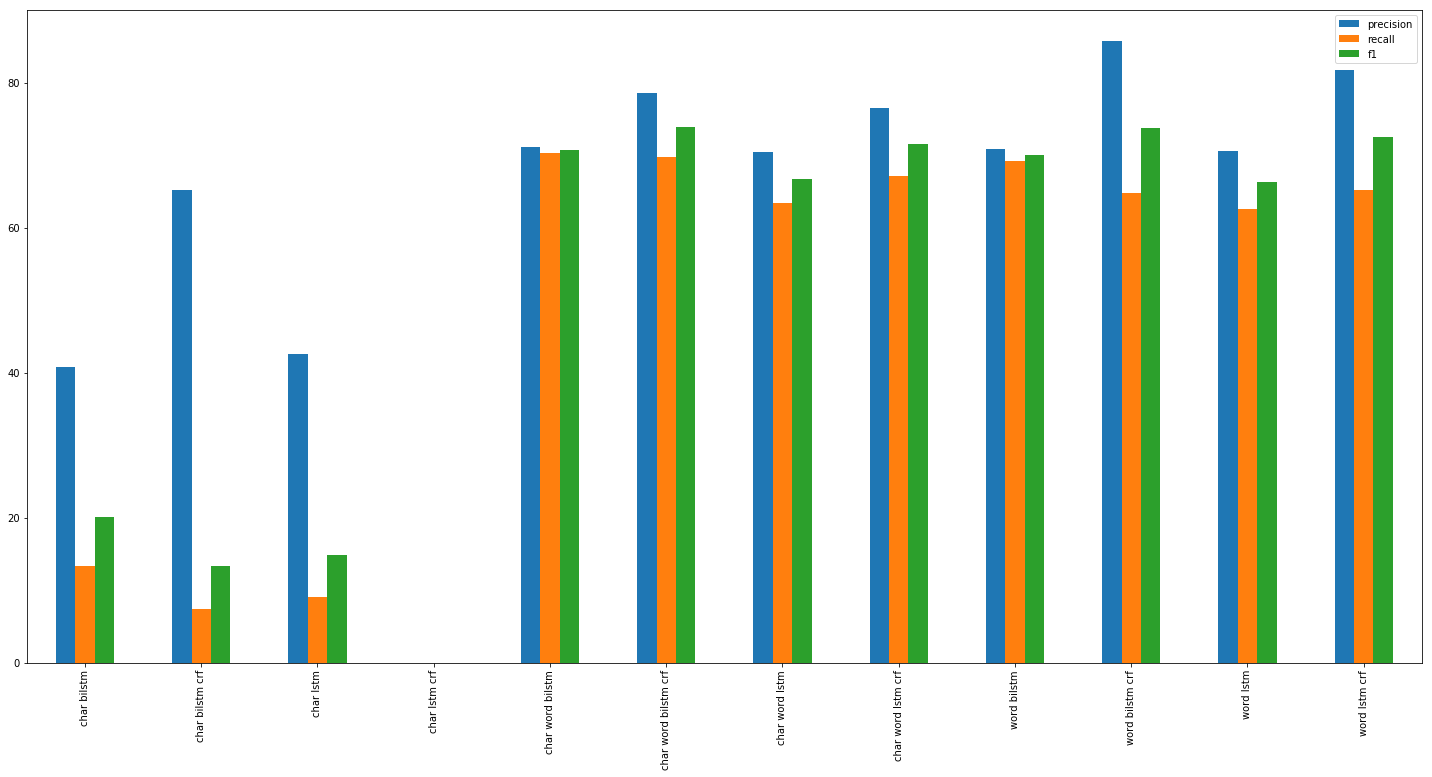

In [23]:
draw_metrics(models_metrics)

In [24]:
list(models_metrics.items())

[('model-info-word-bilstm-10epochs-laptops-train.conll',
  Metrics(precision=70.94155844155844, recall=69.25515055467511, f1=70.08821170809944)),
 ('model-info-char-word-lstm-crf-10epochs-laptops-train.conll',
  Metrics(precision=76.53429602888086, recall=67.19492868462757, f1=71.56118143459915)),
 ('model-info-char-word-lstm-10epochs-laptops-train.conll',
  Metrics(precision=70.54673721340387, recall=63.39144215530903, f1=66.7779632721202)),
 ('model-info-char-bilstm-10epochs-laptops-train.conll',
  Metrics(precision=40.77669902912621, recall=13.312202852614895, f1=20.071684587813614)),
 ('model-info-word-lstm-10epochs-laptops-train.conll',
  Metrics(precision=70.6618962432916, recall=62.59904912836767, f1=66.38655462184875)),
 ('model-info-char-lstm-10epochs-laptops-train.conll',
  Metrics(precision=42.53731343283582, recall=9.033280507131538, f1=14.901960784313728)),
 ('model-info-word-bilstm-crf-10epochs-laptops-train.conll',
  Metrics(precision=85.74423480083857, recall=64.8177496

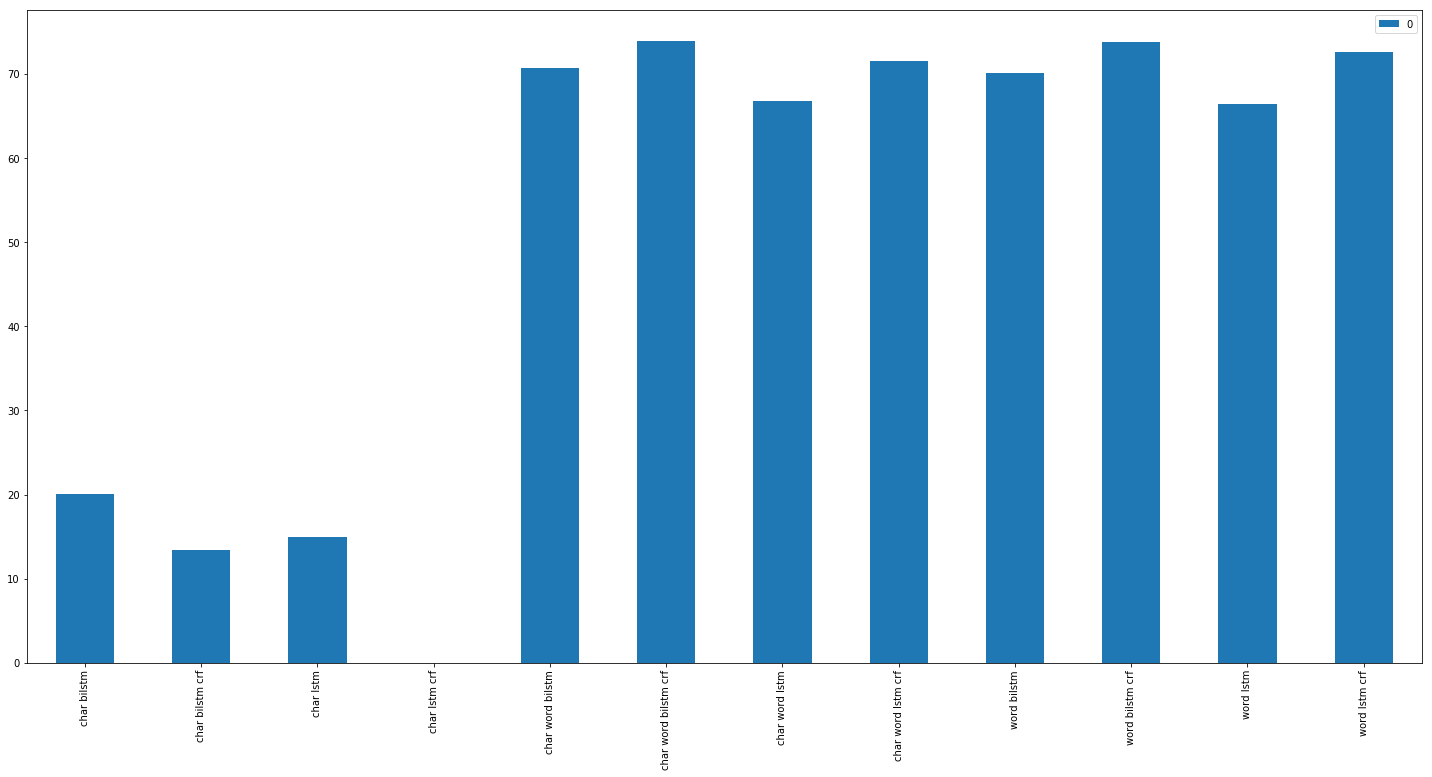

In [25]:
draw_metrics(dict(models_f1))

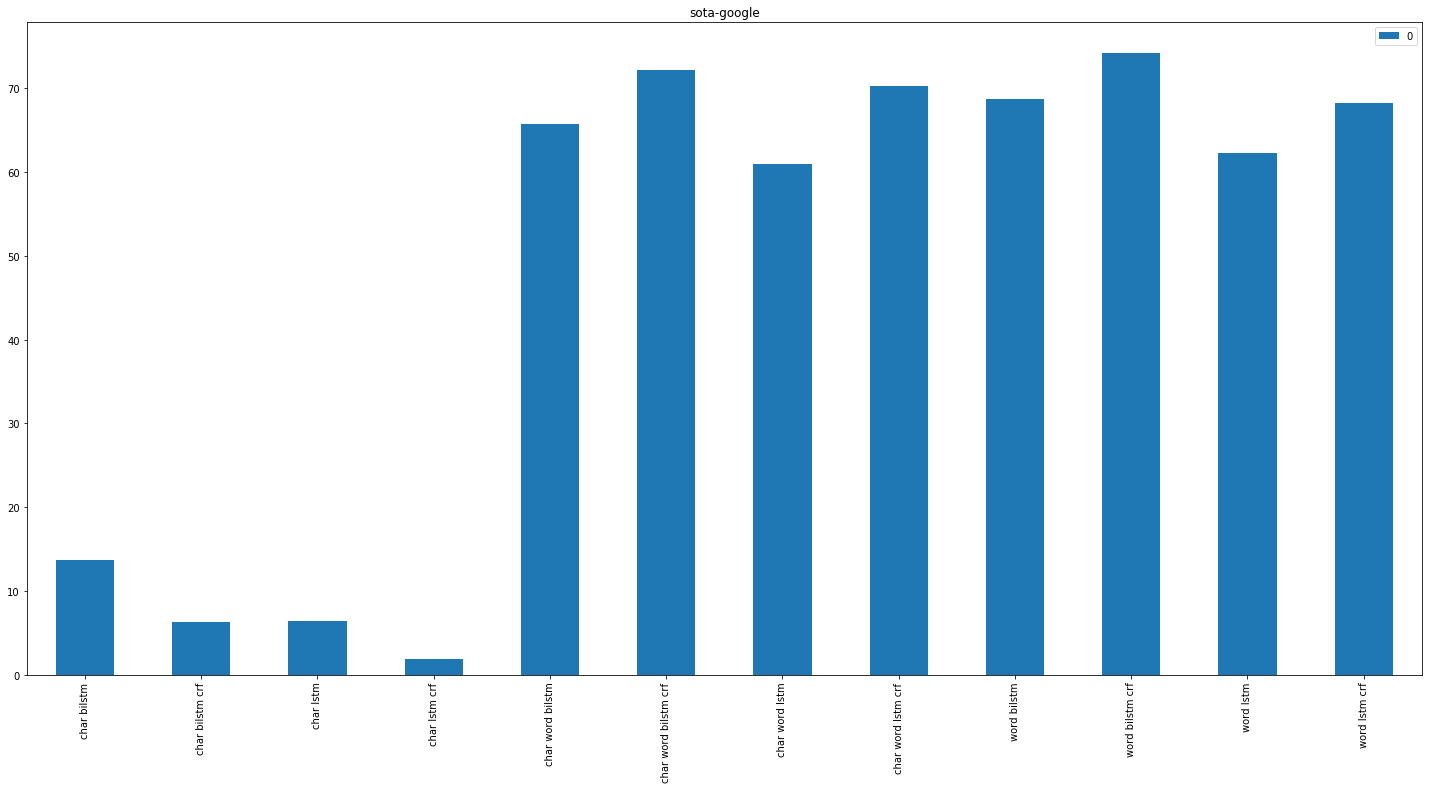

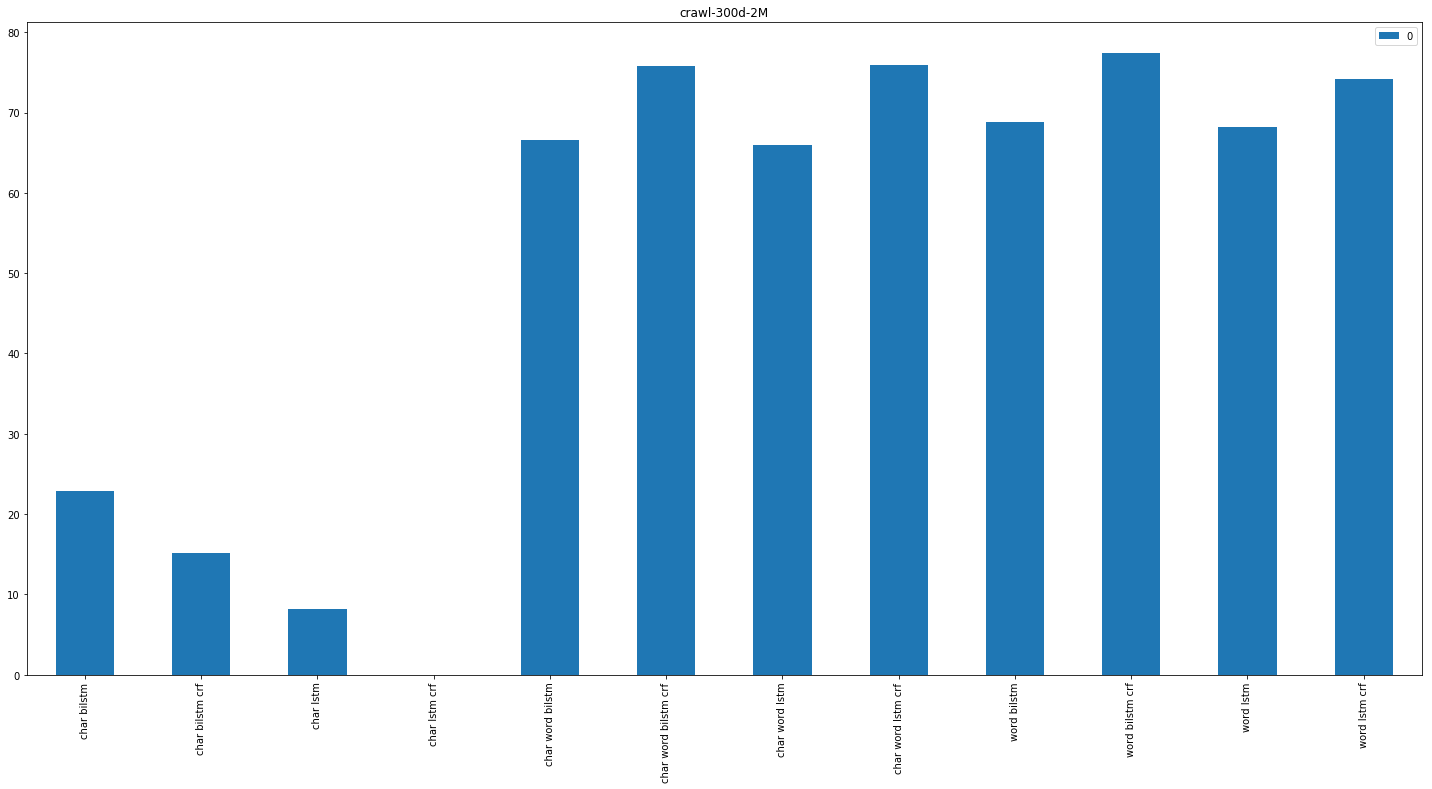

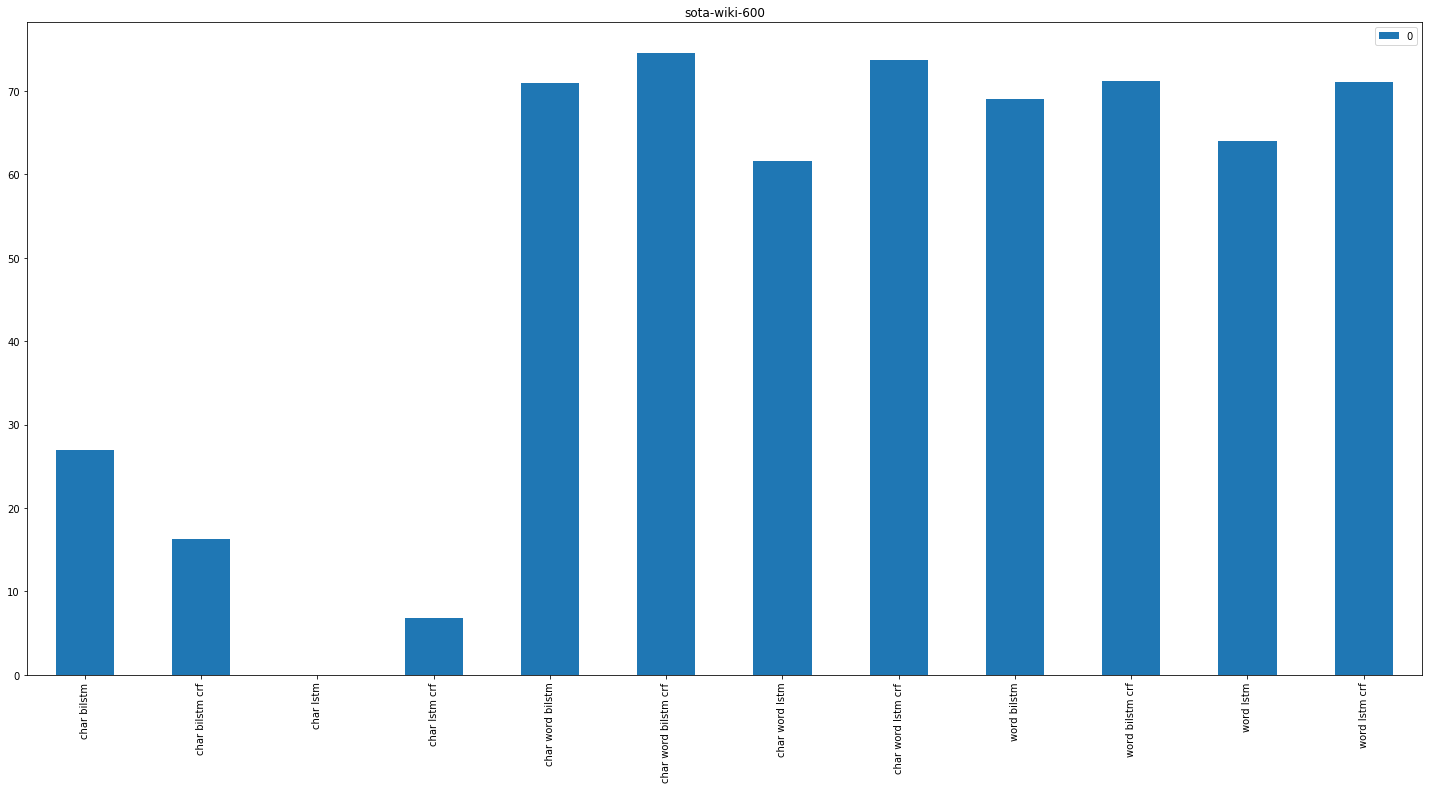

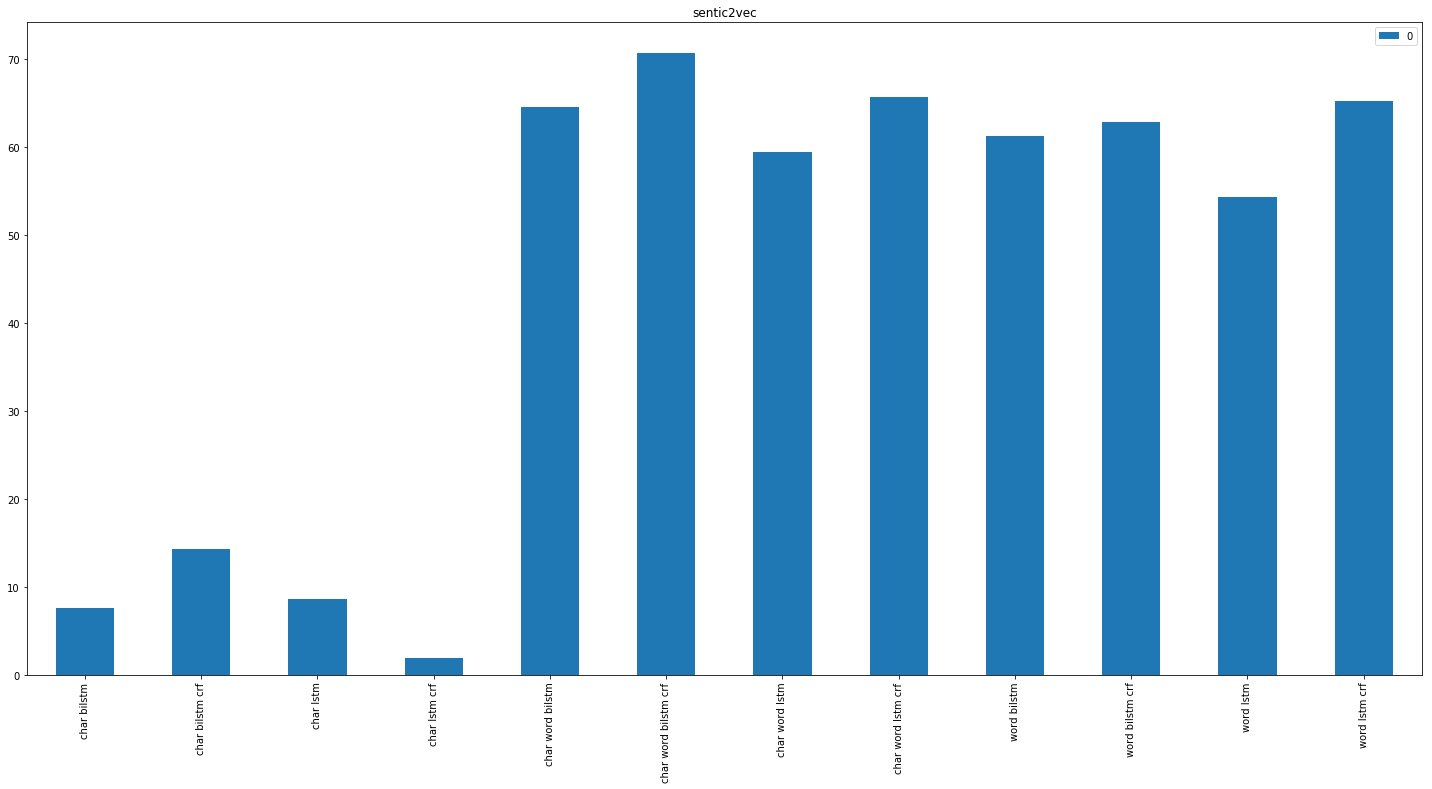

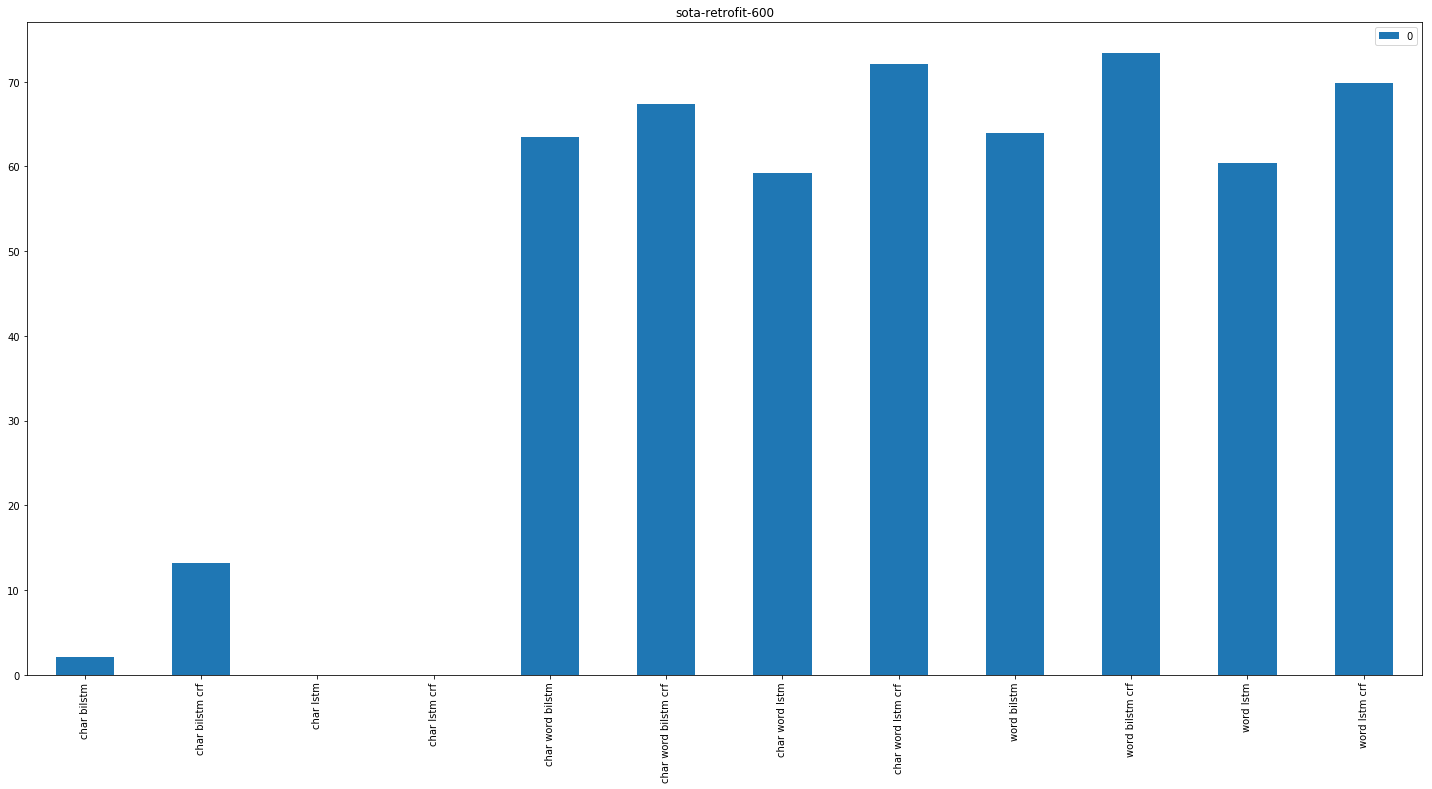

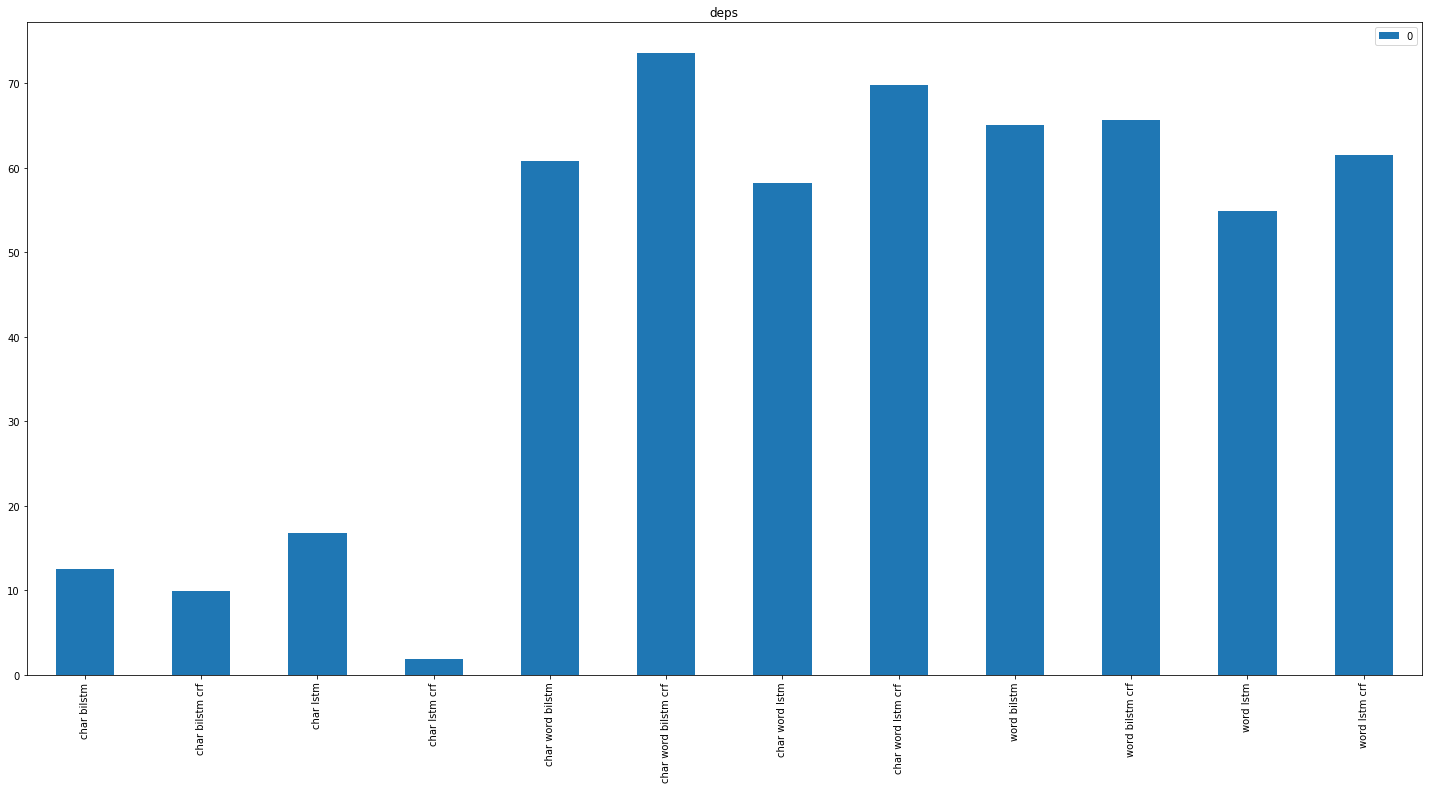

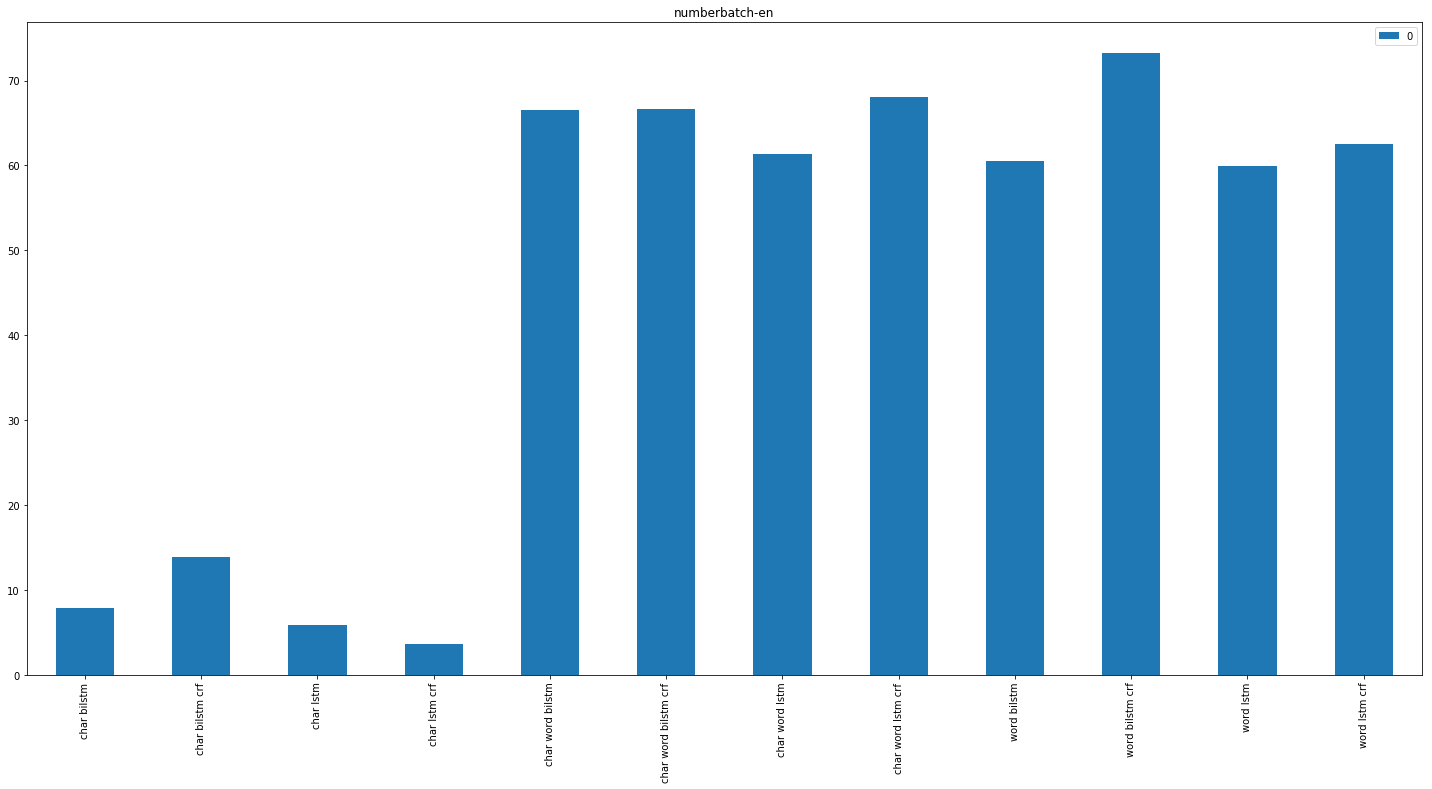

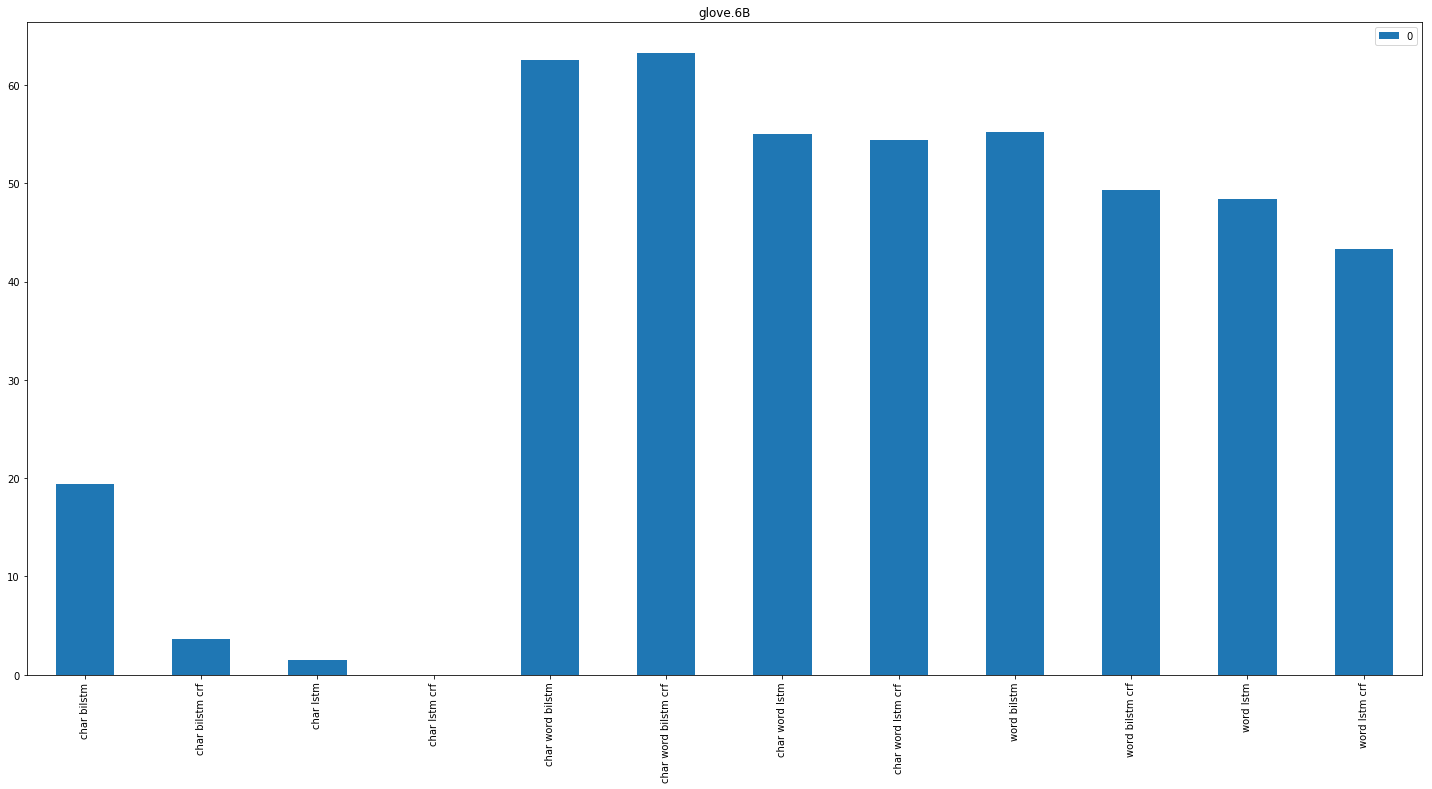

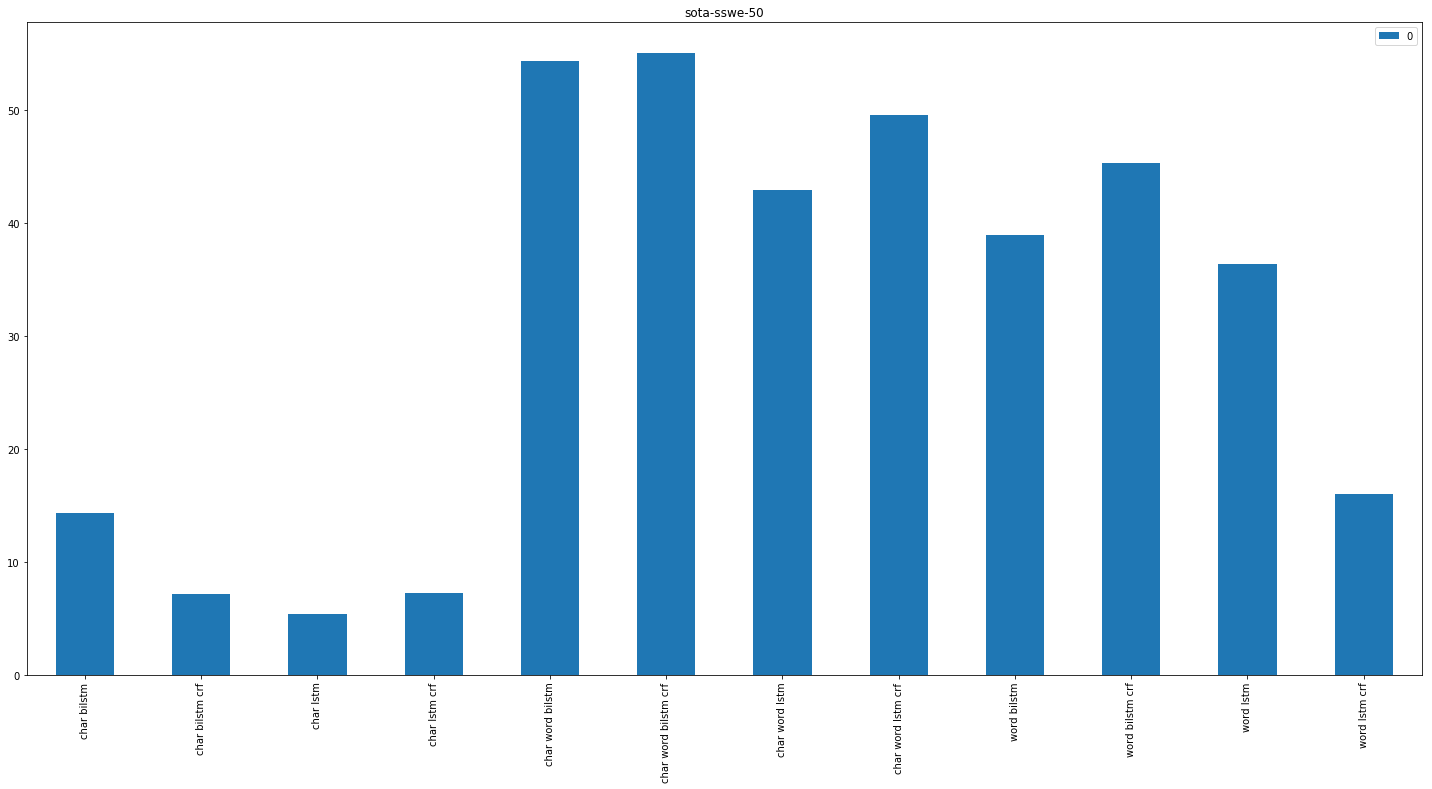

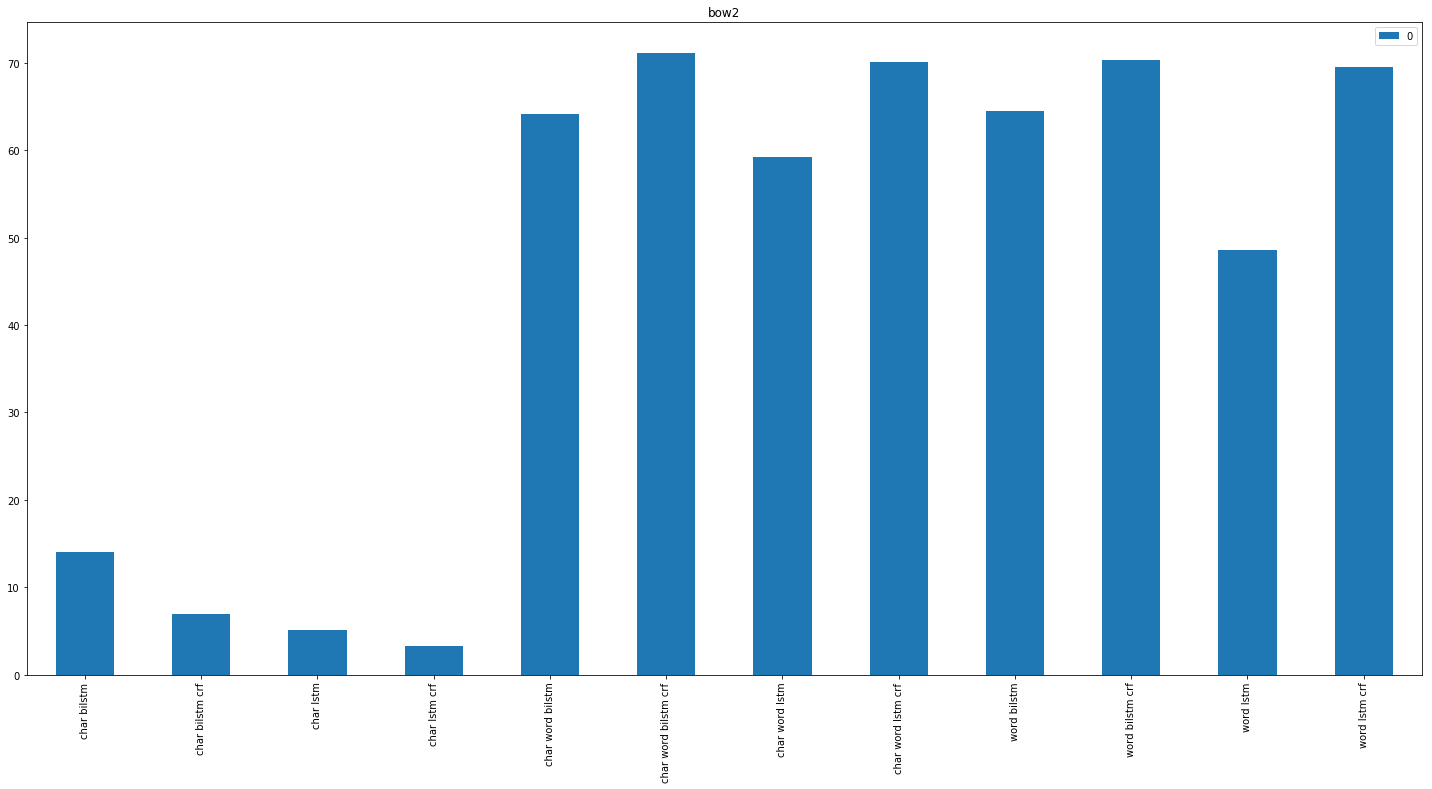

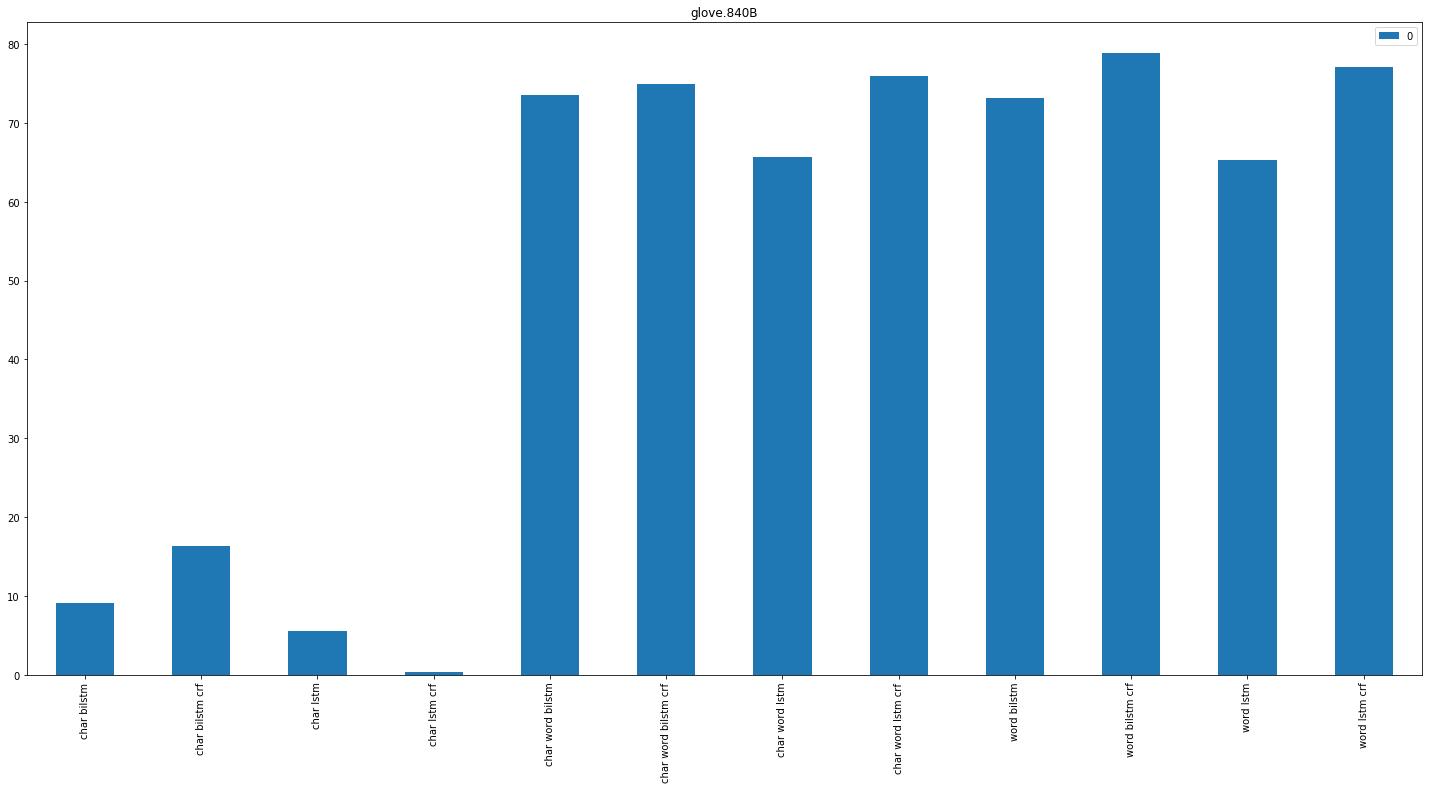

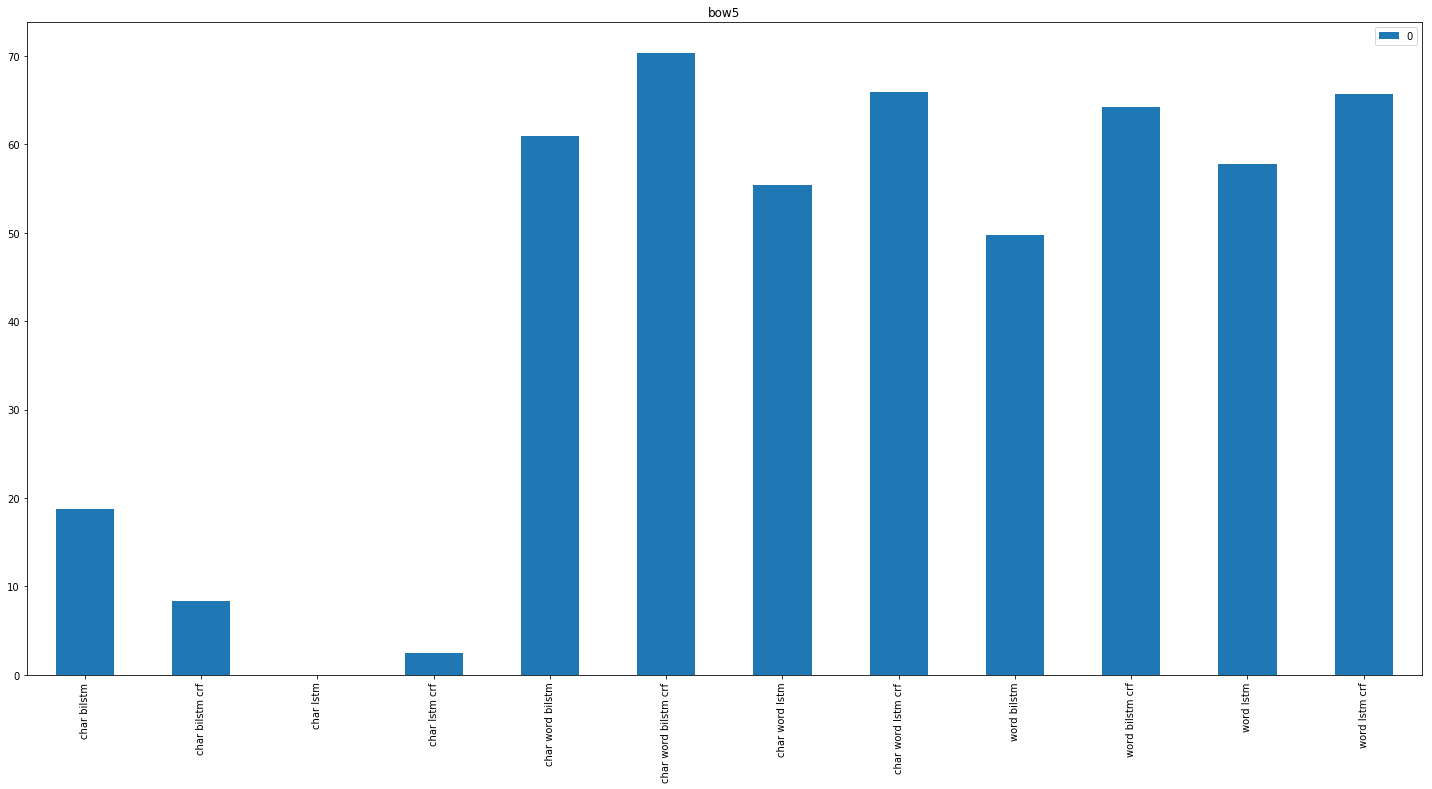

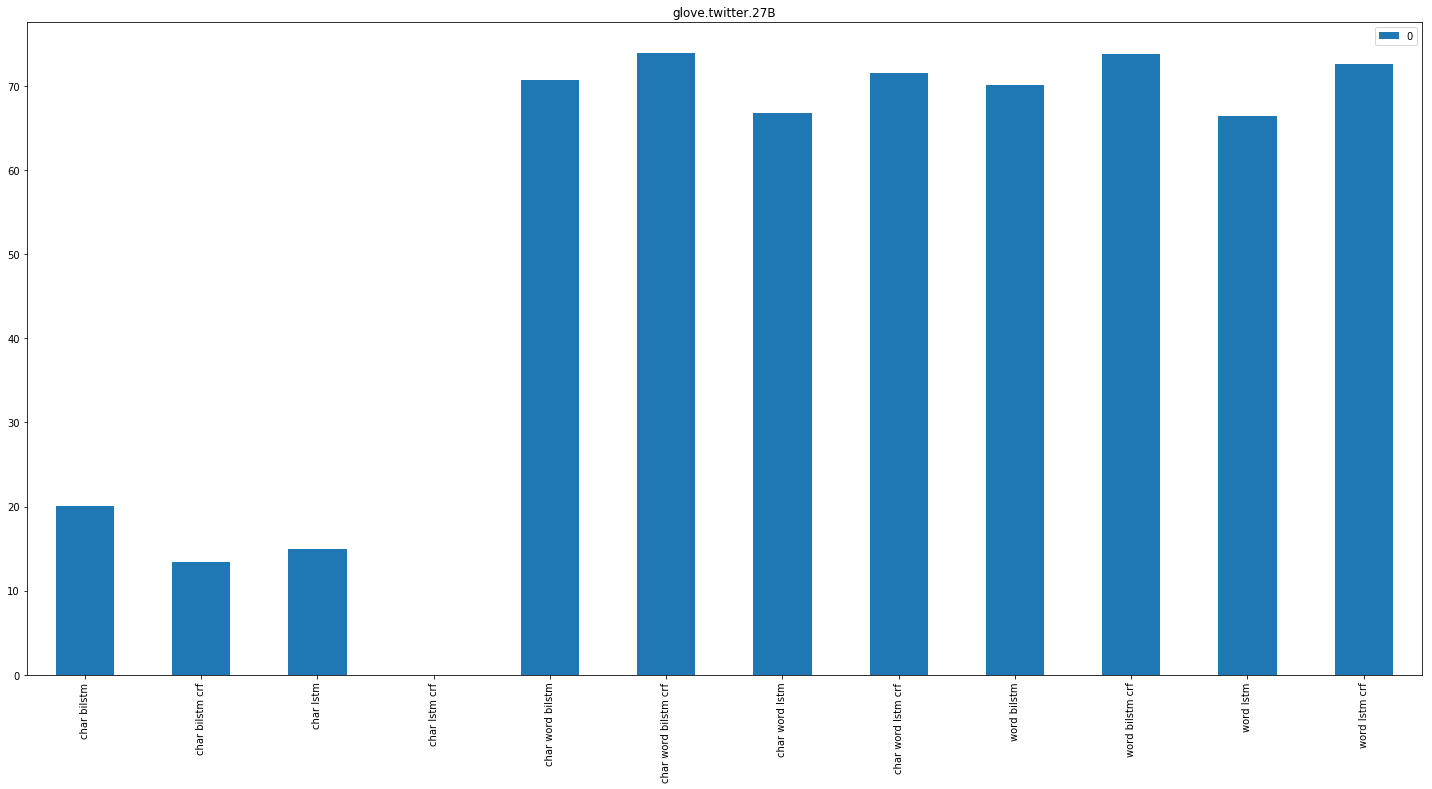

In [26]:
for we_name, we_f1 in model_f1_by_word_embedding.items():
    draw_metrics(dict(we_f1), title=we_name)

In [62]:
for word_embedding_models_path in list(Path('../models').glob('*')):
    models_f1 = []
    
    models_paths = word_embedding_models_path.glob('*10epoch*')

In [65]:
list(models_paths)

[PosixPath('../models/glove.twitter.27B.200d/model-info-word-bilstm-crf-10epochs-restaurants-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-word-bilstm-crf-10epochs-restaurants-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-word-bilstm-10epochs-laptops-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-bilstm-crf-10epochs-restaurants-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-word-lstm-crf-10epochs-laptops-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-word-lstm-crf-10epochs-restaurants-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-word-lstm-10epochs-laptops-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-bilstm-10epochs-laptops-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-lstm-10epochs-restaurants-train.conll.info'),
 Po